In [1]:
import numpy as np
import xarray as xr
import os.path as op
import dask.array as dsar
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import xrft
from matplotlib.colors import SymLogNorm
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
dt = 4.8e3
ys,dy = (1420,5) 
ts = int(ys*360*86400/dt)
te = int(ts+dy*360*86400/dt)
print(ts,te)

9201600 9234000


In [4]:
dsave = open_mdsdataset(op.join(bdir,'100kmMLI_fm07VisR0'), 
                       grid_dir=op.join(bdir,'100km_grid'), 
#                        iters=range(ts+540,te+540,540),
#                        iters=range(int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                       + 177*360*86400/dt)+1440,
#                                   int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                      + 177*360*86400/dt+360*86400*17/dt)+1440,1440),
                       prefix=[
                              'Ttave',
#                               'wVeltave',
                              'PTRtave03',
                              'PTRtave22',
                              'PTRtave23',
#                               ,'PtrFlux03'
                              ], delta_t=dt
                      )
dsave

/home/takaya/xmitgcm/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/100kmMLI_fm07VisR0 or /swot/SUM02/takaya/channelMOC-Darwin/100km_grid. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


<xarray.Dataset>
Dimensions:    (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1260)
Coordinates:
  * XC         (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC         (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG         (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG         (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * Zp1        (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu         (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl         (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2676.0 -2779.0 -2882.0
    rA         (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG        (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG        (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth      (YC, XC) >f4 dask.array<sha

In [232]:
dsGM = open_mdsdataset(op.join(bdir,'100kmMLI_fm07Visdiag'), 
                       grid_dir=op.join(bdir,'100km_grid'), 
                       iters=range(ts+18,te+18,18),
#                        iters=range(int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                       + 177*360*86400/dt)+1440,
#                                   int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                      + 177*360*86400/dt+360*86400*17/dt)+1440,1440),
                       prefix=['GMcoeff',
                               'GMdiags'
#                               ,'PtrFlux03'
                              ], delta_t=dt
                      )
dsGM

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:   (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC        (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG        (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG        (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA        (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG       (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG       (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth     (YC, XC) >f4 dask.array<

In [233]:
dsGM.coords['day'] = ('time',np.tile(range(360),dy))
hB = dsGM.GM_hTrsL
with ProgressBar():
    hB_d = hB.groupby('day').mean(['time','XC']).compute()
hB_d

[########################################] | 100% Completed |  7.4s


<xarray.DataArray 'GM_hTrsL' (day: 360, YC: 20)>
array([[    0., -2985., -2985., ..., -2985., -2985., -2985.],
       [    0., -2985., -2985., ..., -2985., -2985., -2985.],
       [    0., -2985., -2985., ..., -2985., -2985., -2985.],
       ...,
       [    0., -2985., -2985., ..., -2985., -2985., -2985.],
       [    0., -2985., -2985., ..., -2985., -2985., -2985.],
       [    0., -2985., -2985., ..., -2985., -2985., -2985.]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

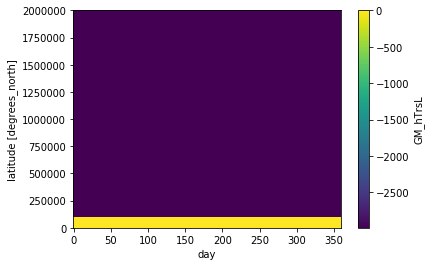

In [234]:
hB_d.T.plot()

In [212]:
dsSF = open_mdsdataset(op.join(bdir,'100kmMLI_fm07Visdiag'), 
                       grid_dir=op.join(bdir,'100km_grid'), 
                       iters=range(ts+540,te+540,540),
#                        iters=range(int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                       + 177*360*86400/dt)+1440,
#                                   int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                      + 177*360*86400/dt+360*86400*17/dt)+1440,1440),
                       prefix=['SF30D'
                              ], delta_t=dt
                      )
dsSF

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:  (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 60)
Coordinates:
  * XC       (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG       (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG       (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2676.0 -2779.0 -2882.0 -2985.0
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA       (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG      (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG      (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth    (YC, XC) >f4 dask.array<shape=(

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


Text(0, 0.5, 'Y [km]')

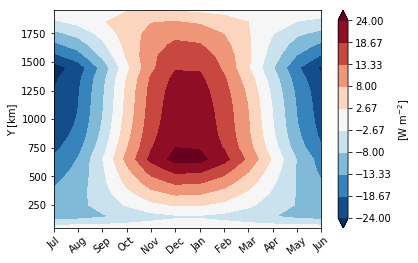

In [213]:
dsSF.coords['month'] = ('time', np.tile(range(12),dy))
fig, ax = plt.subplots()
im = ax.contourf(range(12), dsSF.YC*1e-3,
                dsSF.TFLUX.groupby('month').mean(['time','XC']).roll(month=6).T, 
                cmap='RdBu_r', levels=np.linspace(-24,24,10), extend='both')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"[W m$^{-2}$]")
ax.set_xticks(range(12))
ax.set_xticklabels(['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'],
                  rotation=40)
ax.set_ylabel(r"Y [km]")

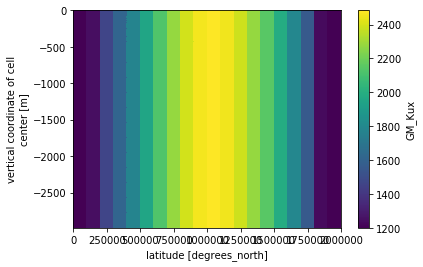

In [201]:
dscoef.GM_Kux.mean(['time','XG']).plot()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


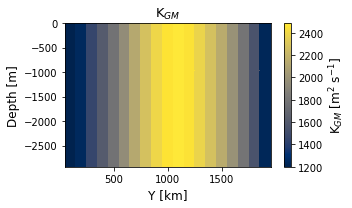

In [209]:
fig, ax = plt.subplots(figsize=(5,3))
fig.set_tight_layout(True)
im = ax.pcolormesh(dscoef.YC*1e-3, dscoef.Z, dscoef.GM_Kux.mean(['time','XG']), 
                  cmap='cividis', rasterized=True)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"K$_{GM}$ [m$^2$ s$^{-1}$]", fontsize=12)
ax.set_title(r"K$_{GM}$", fontsize=13)
ax.set_xlabel(r"Y [km]", fontsize=12)
ax.set_ylabel(r"Depth [m]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/Kgm_100km-fm07VisR1000.pdf'))

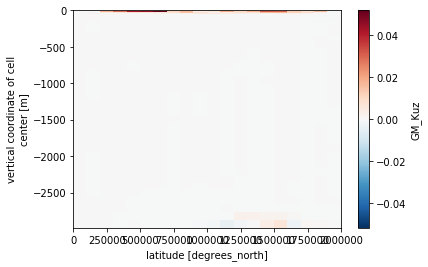

In [42]:
dscoef.GM_Kuz.mean(['time','XG']).plot()

In [ ]:
(dsave.wVeltave[-60:]*86400).mean(['time','XC']).plot()

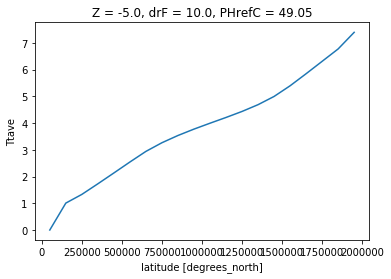

In [76]:
dsave.Ttave[-60:,0].mean(['time','XC']).plot()

In [7]:
grid = Grid(dsave, periodic=['X'])
f0 = -1.1e-4
beta = 1.4e-11
g = 9.81
r0 = 1e3
alpha = 2e-4

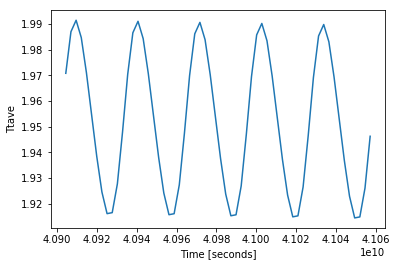

In [78]:
(dsave.Ttave).mean(['Z','YC','XC']).plot()

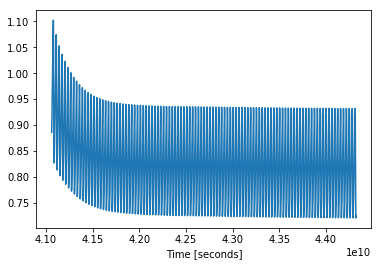

In [7]:
((dsave.PTRtave03*dsave.drF*1e3**-1*1e3).sel(YC=slice(6e5,14e5),Z=slice(0,-300)).sum('Z')/0.036777
).mean(['YC','XC']).plot(figsize=(6,4))

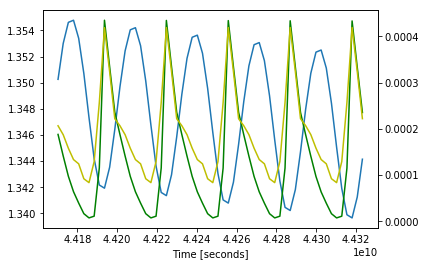

In [29]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
(dsave.Ttave*dsave.drF*np.abs(dsave.Zp1.data[-1])**-1).sum('Z').mean(['YC','XC']).plot(ax=ax)
(dsave.PTRtave22*dsave.drF*np.abs(dsave.Zp1.data[-1])**-1).sum('Z').mean(['YC','XC']).plot(ax=ax2, c='g')
(dsave.PTRtave23*dsave.drF*np.abs(dsave.Zp1.data[-1])**-1).sum('Z').mean(['YC','XC']).plot(ax=ax2, c='y')

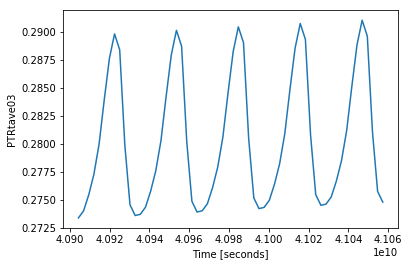

In [81]:
(dsave.PTRtave03*1e3).mean(['Z','YC','XC']).plot()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


[Text(0, 0, 'J'),
 Text(0, 0, 'A'),
 Text(0, 0, 'S'),
 Text(0, 0, 'O'),
 Text(0, 0, 'N'),
 Text(0, 0, 'D'),
 Text(0, 0, 'J'),
 Text(0, 0, 'F'),
 Text(0, 0, 'M'),
 Text(0, 0, 'A'),
 Text(0, 0, 'M'),
 Text(0, 0, 'J')]

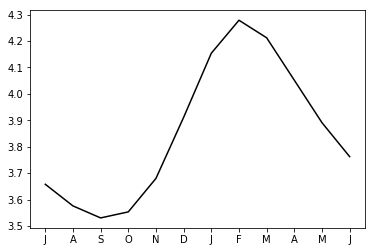

In [82]:
fig, ax = plt.subplots()
ax.plot(range(12), dsave.Ttave[-12:,0].sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(time=-6).data, 'k')
ax.set_xticks(range(12))
ax.set_xticklabels(['J','A','S','O','N','D','J','F','M','A','M','J'])

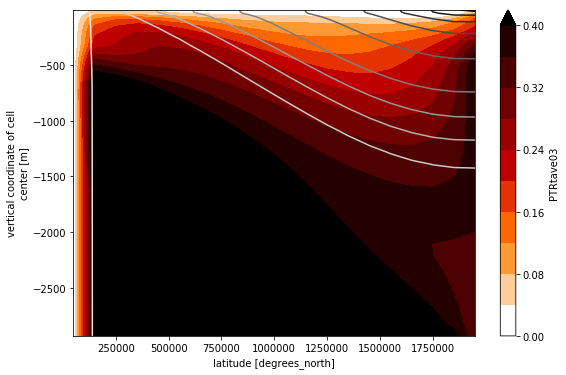

In [30]:
fig,ax = plt.subplots(figsize=(9,6))
(dsave.PTRtave03[-60:].mean(['time','XC'])*1e3).plot.contourf(ax=ax, levels=np.linspace(0,.4,11),
                                                             cmap='gist_heat_r', extend='max')
dsave.Ttave[-60:].mean(['time','XC']).plot.contour(ax=ax, levels=np.linspace(0,7,11),
                                                  cmap='binary', extend='both')

In [84]:
Tave = dsave.Ttave[-120:].mean(['XC'])
with ProgressBar():
    hT = 2*((Tave.mean('time')*dsave.Z*dsave.drF).sum('Z')/(Tave.mean('time')*dsave.drF).sum('Z')).compute()
hT

[########################################] | 100% Completed |  0.2s


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:253: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


<xarray.DataArray (YC: 20)>
array([       nan, -2960.3928, -2920.0613, -2853.7634, -2764.564 , -2656.2986,
       -2535.698 , -2414.321 , -2299.4568, -2197.5293, -2111.73  , -2043.3052,
       -1991.1104, -1952.395 , -1923.5405, -1899.6007, -1879.3302, -1862.4846,
       -1849.8444, -1847.7274], dtype=float32)
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0

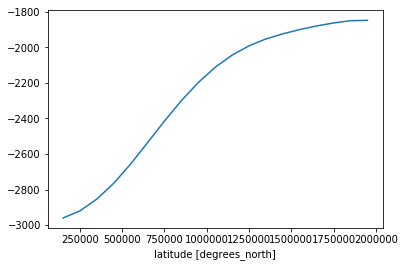

In [85]:
hT.plot()

In [20]:
Uave = dsave.uVeltave.mean(['XG'])
# Uanom = Uave - grid.interp(ug.mean('XC'), 'Y', boundary='fill')
# fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
# Uave[-120:].mean('time').plot(ax=ax1, vmax=.5)
# Uanom[-120:].mean('time').plot(ax=ax2, vmax=.5)

AttributeError: 'Dataset' object has no attribute 'uVeltave'

In [21]:
uC = g*alpha * ((grid.diff(Tave * grid.interp(dsave.dxC,'X').mean('XC'),
                          'Y', boundary='fill')*dsave.rAs.mean('XC')**-1 * dsave.Z
                ).sum('Z') * dsave.dyC.mean('XC')).sum('YG') * f0**-1
uC

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


<xarray.DataArray (time: 120)>
dask.array<shape=(120,), dtype=float32, chunksize=(1,)>
Coordinates:
  * time     (time) float64 2.615e+09 2.618e+09 ... 2.921e+09 2.924e+09

In [44]:
uB = np.abs(dsave.Zp1[-1]) * (dsave.uVeltave[:,-1]*dsave.dyG).mean('XG').sum('YC')
uB

<xarray.DataArray (time: 60)>
dask.array<shape=(60,), dtype=float32, chunksize=(1,)>
Coordinates:
    Zp1      >f4 -2985.0
    drC      float64 dask.array<shape=(), chunksize=()>
    PHrefF   >f4 dask.array<shape=(), chunksize=()>
    Z        >f4 -2933.5
    drF      >f4 dask.array<shape=(), chunksize=()>
    PHrefC   >f4 dask.array<shape=(), chunksize=()>
    iter     (time) int64 dask.array<shape=(60,), chunksize=(1,)>
  * time     (time) float64 1.509e+10 1.509e+10 ... 1.524e+10 1.524e+10

In [32]:
with ProgressBar():
    uT = (Uave*dsave.drF*dsave.dyG.mean(['XG'])).sum(['Z','YC']).compute()
# with ProgressBar():
#     uC = (Uanom*dsave.drF*dsave.dyG.mean(['XG'])).sum(['Z','YC']).compute()
# uC

[########################################] | 100% Completed |  1min  4.9s


[Text(1, 0, '74'), Text(1, 0, '74.5'), Text(1, 0, '75')]

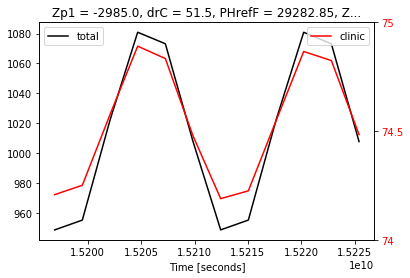

In [47]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
(uT[-18:-6]*1e-6).plot(ax=ax, c='k', label=r'total')
((uT-uB)[-18:-6]*1e-6).plot(ax=ax2, c='r', label=r'clinic')
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
ax2.set_yticks([74,74.5,75])
ax2.set_yticklabels([74,74.5,75], color='r')

In [6]:
ds = open_mdsdataset(op.join(bdir,'100kmMLI_fm07VisR0diag'), 
                    grid_dir=op.join(bdir,'100km_grid'), 
                    iters=range(ts+18,te+18,18),
                    prefix=['MOMtave','FeTtave','BIOtave',
                           'KPPboundary'
                           ], delta_t=dt
                    )
ds

<xarray.Dataset>
Dimensions:   (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
    iter      (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time      (time) float64 4.417e+10 4.417e+10 ... 4.432e+10 4.432e+10
  * XC        (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC        (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG        (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG        (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA        (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG       (YG, XC) >f4 dask.array<shape=

In [7]:
grid = Grid(ds, periodic=['X'])

In [8]:
P1 = ds.TRAC22
P2 = ds.TRAC23
# Z1 = ds.TRAC08
# Z2 = ds.TRAC12
PP = ds.PP
Fe1D = ds.TRAC03

In [135]:
P1

<xarray.DataArray 'TRAC22' (time: 1800, Z: 40, YC: 20, XC: 10)>
array([[[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-1.481944e-04, ..., -1.481944e-04]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-1.137391e-08, ..., -1.137391e-08]]],


       ...,


       [[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-1.486689e-04, ..., -1.486689e-04]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-6.588748e-09, ..., -6.588748e-09]]]], dtype=float32)
Coordinates:
    iter     (time) int64 8521218 8521236 8521254 ... 8553564 8553582 8553600
  * time     (time) float64 4.09e+10 4.09e+10 4.09e+10 ... 4.106e+10 4.106e+10
  * XC       (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
    rA       (YC, XC) >f4 10000000000.0 100

In [181]:
ds.coords['15D'] = ('time',np.tile(np.repeat(range(24),15),dy))
dsmon = ds.groupby('15D').mean(['time','XC'])
dsmon

<xarray.Dataset>
Dimensions:   (15D: 24, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, month: 1800)
Coordinates:
  * YC        (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG        (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG        (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    dyG       (YC, XG) >f4 100000.0 100000.0 100000.0 ... 100000.0 100000.0
    rAz       (YG, XG) >f4 10000000000.0 10000000000.0 ... 10000000000.0
    dxC       (YC, XG) >f4 100000.0 100000.0 100000.0 ... 100000.0 100000.0
    rAw       (YC, XG) >f4 10000000000.0 10000000000.0 ... 10000000000.0
    drC       (Zp1) float64 5.0 10.0 10.

In [182]:
wgmFe = dsmon.WTRAC03 - grid.interp(dsmon.WVEL,'Z',boundary='fill')*dsmon.TRAC03
wgmFe

<xarray.DataArray (15D: 24, Z: 40, YC: 20)>
dask.array<shape=(24, 40, 20), dtype=float32, chunksize=(1, 39, 20)>
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0
    PHrefC   (Z) >f4 49.05 147.15 245.25 ... 26756.775 27767.205 28777.635
  * 15D      (15D) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

In [184]:
with ProgressBar():
    wgmFe_15D = wgmFe.sel(YC=slice(6e5,14e5)).mean('YC').compute()
wgmFe_15D

[########################################] | 100% Completed | 14.2s


<xarray.DataArray (15D: 24, Z: 40)>
array([[-7.571263e-14, -1.064659e-13, -8.348351e-14, ..., -2.323927e-13,
        -2.670843e-13,  3.180468e-11],
       [-3.297747e-14, -7.049569e-14, -7.419532e-14, ..., -6.977361e-14,
        -7.449813e-14,  2.991937e-11],
       [-2.306543e-14, -6.273611e-14, -7.750528e-14, ...,  1.620913e-13,
         1.926744e-13,  2.829808e-11],
       ...,
       [-1.320107e-13, -1.860042e-13, -2.085344e-13, ...,  3.127689e-13,
         2.273286e-13,  3.055949e-11],
       [-1.501406e-13, -1.871764e-13, -1.781856e-13, ..., -1.252024e-13,
        -2.157267e-13,  3.423618e-11],
       [-1.164251e-13, -1.457659e-13, -1.107303e-13, ..., -3.312142e-13,
        -4.157516e-13,  3.464055e-11]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0
    PHrefC   (Z) >f4 49.05 147.15 245.25 ... 26756.775 27767.205 28777.635
  * 15D      (15

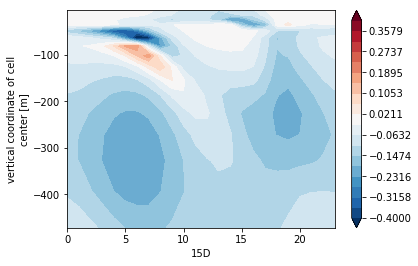

In [195]:
(wgmFe_15D.sel(Z=slice(None,-500))*1e3*(360*86400)).T.plot.contourf(levels=1e-1*np.linspace(-4.,4.,20), 
                                                                    cmap='RdBu_r', extend='both')

In [9]:
P1.coords['days'] = ('time',np.tile(range(360),dy))
P2.coords['days'] = ('time',np.tile(range(360),dy))
# Z1.coords['days'] = ('time',np.tile(range(360),dy))
# Z2.coords['days'] = ('time',np.tile(range(360),dy))
PP.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    P1day = P1.sel(YC=slice(6e5,14e5)).load().groupby('days').median(['time','YC','XC'])
    P2day = P2.sel(YC=slice(6e5,14e5)).load().groupby('days').median(['time','YC','XC'])
#     Z1day = Z1.groupby('days').mean(['time']).compute()
#     Z2day = Z2.groupby('days').mean(['time']).compute()
    PPday = PP.sel(YC=slice(6e5,14e5)).load().groupby('days').median(['time','YC','XC'])

[########################################] | 100% Completed | 16.5s
[########################################] | 100% Completed | 10.0s
[########################################] | 100% Completed |  6.1s


In [10]:
nz = 8
with ProgressBar():
    P1Cday = (grid.cumsum(P1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     P1Cintg = (P1day*ds.drF).sum('Z').compute()
#     P2Cintg = (P2day*ds.drF).sum('Z').compute()
#     Z1Cintg = (Z1day*ds.drF).sum('Z').compute()
#     Z2Cintg = (Z2day*ds.drF).sum('Z').compute()
PtotCday = P1Cday+P2Cday
PPCday = PPday*106.*12.

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [11]:
PtotCday.sum()

<xarray.DataArray ()>
array(3639.5273, dtype=float32)
Coordinates:
    Zl       >f4 -113.0

In [176]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['dz'] = ds.drF
dsave['Z'] = ds.Zl
dsave.to_netcdf(op.join(bdir,'Ptot_600-1400km_100kmDailyClim_fm07VisR1000.nc'))
dsave

<xarray.Dataset>
Dimensions:  (Z: 40, Zl: 40, days: 360)
Coordinates:
    Z        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0
    PHrefC   (Z) >f4 49.05 147.15 245.25 ... 26756.775 27767.205 28777.635
  * days     (days) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
Data variables:
    Ptot_d   (days, Z) float32 0.013881973 0.013954293 ... -4.1352582e-08
    dz       (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0

In [97]:
hbl99 = xr.DataArray(np.percentile(ds.KPPhbl, 99, axis=-1), dims=['time','YC'],
                    coords={'time':ds.time,'YC':ds.YC})
hbl99.coords['day'] = ('time',np.tile(range(360),dy))
hbl99.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
hbl99.coords['month'] = ('time',np.tile(np.repeat(range(12),30),dy))
hbl99.to_dataset(name='hbl99').to_netcdf(op.join(bdir,'KPPhbl_99percentile_100kmMLI-02km_fm07VisR1000.nc'))
# hbl99 = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce007_Tau55-02km.nc'), 
#                         decode_times=False).hbl99
with ProgressBar():
    hbl99_day = hbl99.groupby('day').mean('time').compute()
# #     hbl99_sea = hbl99.groupby('seas').mean('time').compute()
# #     hbl99_mon = hbl99.groupby('month').mean('time').compute()
hbl99_day

<xarray.DataArray (day: 360, YC: 20)>
array([[ 0., 30., 30., ..., 30., 30., 30.],
       [ 0., 30., 30., ..., 30., 30., 30.],
       [ 0., 30., 30., ..., 30., 30., 30.],
       ...,
       [ 0., 30., 30., ..., 30., 30., 30.],
       [ 0., 30., 30., ..., 30., 30., 30.],
       [ 0., 30., 30., ..., 30., 30., 30.]])
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

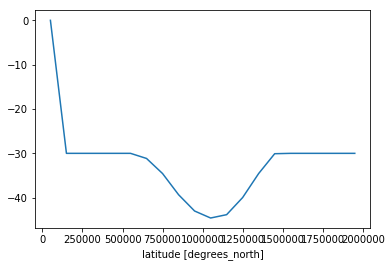

In [98]:
(-hbl99).mean(['time']).plot()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


[Text(0, 0, 'J'),
 Text(0, 0, 'A'),
 Text(0, 0, 'S'),
 Text(0, 0, 'O'),
 Text(0, 0, 'N'),
 Text(0, 0, 'D'),
 Text(0, 0, 'J'),
 Text(0, 0, 'F'),
 Text(0, 0, 'M'),
 Text(0, 0, 'A'),
 Text(0, 0, 'M'),
 Text(0, 0, 'J')]

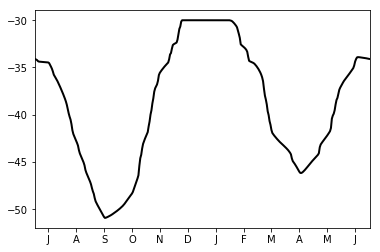

In [99]:
fig, ax = plt.subplots()
ax.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180).data, 
       lw=2, color='k')
ax.set_xticks(range(14,360,30))
ax.set_xlim([0,360])
ax.set_xticklabels(['J','A','S','O','N','D','J','F','M','A','M','J'])

In [18]:
dtheta = .2
theta = ds.THETA.load()

In [28]:
zML = theta[:,0].copy()
for k in range(len(zML.time)):
    for j in range(len(zML.YC)):
        for i in range(len(zML.XC)):
            zML[k,j,i] = ds.Z[np.argmin(np.abs(theta[k,0,j,i]-theta[k,:,j,i]-dtheta))]
zML

<xarray.DataArray 'THETA' (time: 1800, YC: 20, XC: 10)>
array([[[   -5. ,    -5. , ...,    -5. ,    -5. ],
        [-2933.5, -2933.5, ..., -2933.5, -2933.5],
        ...,
        [  -25. ,   -25. , ...,   -25. ,   -25. ],
        [   -5. ,    -5. , ...,    -5. ,    -5. ]],

       [[   -5. ,    -5. , ...,    -5. ,    -5. ],
        [-2933.5, -2933.5, ..., -2933.5, -2933.5],
        ...,
        [  -25. ,   -25. , ...,   -25. ,   -25. ],
        [   -5. ,    -5. , ...,    -5. ,    -5. ]],

       ...,

       [[   -5. ,    -5. , ...,    -5. ,    -5. ],
        [-2933.5, -2933.5, ..., -2933.5, -2933.5],
        ...,
        [  -25. ,   -25. , ...,   -25. ,   -25. ],
        [   -5. ,    -5. , ...,    -5. ,    -5. ]],

       [[   -5. ,    -5. , ...,    -5. ,    -5. ],
        [-2933.5, -2933.5, ..., -2933.5, -2933.5],
        ...,
        [  -25. ,   -25. , ...,   -25. ,   -25. ],
        [   -5. ,    -5. , ...,    -5. ,    -5. ]]], dtype=float32)
Coordinates:
    iter     (time) int64 9

In [41]:
theta.coords['day'] = ('time',np.tile(range(360),dy))
nML = theta[:,0].groupby('day').mean(['time','XC']).copy()
for k in range(len(nML.day)):
    for j in range(len(nML.YC)):
        nML[k,j] = np.argmin(np.abs(theta[k,0,j].mean('XC')-theta[k,:,j].mean('XC')-dtheta))
nML
# zz = xr.DataArray(np.abs(ds.Zl).data[np.newaxis,:,np.newaxis]*np.ones((120,400))[:,np.newaxis,:],
#                  dims=['day','Zl','YC'])
# nMLD = np.argmin(np.abs(zz-zML[::15].sel(YC=slice(6e5,14e5)).mean('YC','XC')), axis=1)

<xarray.DataArray 'THETA' (day: 360, YC: 20)>
array([[ 0., 39.,  4., ...,  2.,  2.,  0.],
       [ 0., 39.,  4., ...,  2.,  2.,  0.],
       [ 0., 39.,  4., ...,  2.,  2.,  0.],
       ...,
       [ 0., 39.,  4., ...,  2.,  2.,  0.],
       [ 0., 39.,  4., ...,  2.,  2.,  0.],
       [ 0., 39.,  4., ...,  2.,  2.,  0.]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
    Z        >f4 -5.0
    drF      >f4 10.0
    PHrefC   >f4 49.05
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

In [42]:
nMLD100_15 = nML[::15].data.copy()
nMLD100_15[nMLD100_15<8] = 8
nMLD100_15 = xr.DataArray(np.asarray(nMLD100_15,dtype=int), dims=['day','YC'], 
                          coords={'day':range(24),'YC':zML.YC.data})
nMLD100_15

<xarray.DataArray (day: 24, YC: 20)>
array([[ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       ...,
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0

In [49]:
zML.coords['days'] = ('time',np.tile(range(360),dy))

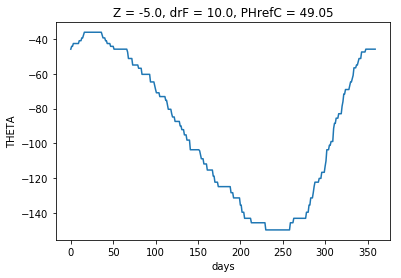

In [126]:
zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).plot()

In [36]:
dsnap = open_mdsdataset(op.join(bdir,'100kmMLI_fm07VisR0'), 
                       grid_dir=op.join(bdir,'100km_grid'), iters=range(ts,te,270),
                       prefix=['PTRACER03',
                               'W',
                               'PTRACER22',
                               'PTRACER23'
#                               'PTRACER26'
                              ], delta_t=dt
                       )
dsmon = open_mdsdataset(op.join(bdir,'100kmMLI_fm07VisR0'), 
                       grid_dir=op.join(bdir,'100km_grid'), iters=range(ts+540,te+540,540),
                       prefix=['PTRtave03',
                               'wVeltave',
#                               'PTRtave26'
                              ], delta_t=dt
                       )
wsp = dsnap.W
Fesp = dsnap.PTRACER03
# POCsp = dsnap.PTRACER26
wm = dsmon.wVeltave
Fem = dsmon.PTRtave03
# POCm = dsmon.PTRtave26
# print(wsp,wm)
# Psp = dsnap.PTRACER22 + dsnap.PTRACER23
# Psp

/home/takaya/xmitgcm/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/100kmMLI_fm07VisR0 or /swot/SUM02/takaya/channelMOC-Darwin/100km_grid. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


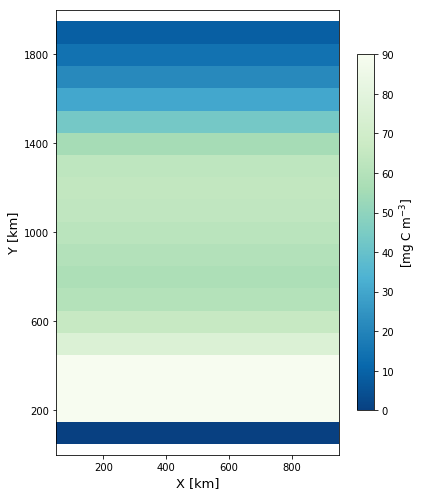

In [235]:
fig, ax = plt.subplots(figsize=(6,7))
fig.set_tight_layout(True)
im = ax.pcolormesh(Psp.XC*1e-3, Psp.YC*1e-3, Psp[-4,0]*106*12,
                   vmax=90, vmin=0, cmap='GnBu_r', rasterized=True)
cbar = fig.colorbar(im, ax=ax, shrink=.8)
cbar.set_label(r"[mg C m$^{-3}$]", fontsize=12)
ax.set_ylim([0,2000])
ax.set_yticks([200,600,1000,1400,1800])
ax.set_xlabel(r"X [km]", fontsize=13)
ax.set_ylabel(r"Y [km]", fontsize=13)
plt.savefig(op.join(bdir,'Figures/Psnap_Nov-1_100km-fm07Vis.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


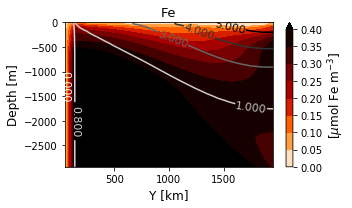

In [199]:
tlevs = np.array([0,.8,1,3,4,5])
fig, ax = plt.subplots(figsize=(5,3))
fig.set_tight_layout(True)
im = ax.contourf(dsmon.YC*1e-3, dsmon.Z, Fem.mean(['time','XC'])*1e3,
               levels=np.linspace(0,.4,9), extend='max', cmap = 'gist_heat_r')
cs = ax.contour(dsave.YC*1e-3, dsave.Z, dsave.Ttave[-60:].mean(['time','XC']), 
              levels=tlevs, cmap='binary')
for c in im.collections:
    c.set_rasterized(True)
for c in cs.collections:
    c.set_rasterized(True)
ax.set_title(r"Fe", fontsize=13)
ax.set_ylabel(r"Depth [m]", fontsize=12)
ax.set_xlabel(r"Y [km]", fontsize=12)
ax.set_ylim([dsmon.Z[-1],0])
plt.clabel(cs, inline=1, fontsize=11)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"[$\mu$mol Fe m$^{-3}$]",fontsize=12)
plt.savefig(op.join(bdir,'Figures/Fe-transect_100km-fm07VisR1000.pdf'))

In [37]:
diff = ds.DFrITr03+ds.DFrETr03
advW = ds.ADVrTr03
dfz_cons = diff/(ds.rA)
adz_cons = advW/(ds.rA)
dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
wsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
Fesp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
wm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
Fem.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
# POCsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
# POCm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
wp = wsp.groupby('seas') - wm.groupby('seas').mean(['time','XC'])
Fep = Fesp.groupby('seas') - Fem.groupby('seas').mean(['time','XC'])
# POCp = POCsp.groupby('seas') - POCm.groupby('seas').mean(['time','XC'])

In [38]:
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
# wFep = wsp*grid.interp(Fep,'Z',boundary='fill')
wpFep.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    adz_c = adz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed |  9.2s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  2.9s


In [164]:
(wpFep+dfz_cons.data[::15]).sel(YC=slice(6e5,14e5)
                                          ).groupby('day').mean(['time','XC'])
nMLD100_15.sel(YC=slice(6e5,14e5))

<xarray.DataArray (day: 120, YC: 20)>
array([[ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       ...,
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8],
       [ 8, 39,  8, ...,  8,  8,  8]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0

In [43]:
with ProgressBar():
    F_MLD = (wpFep+dfz_cons.data[::15]).sel(YC=slice(6e5,14e5)
                                          ).groupby('day').mean(['time','XC']).isel(Zl=nMLD100_15.sel(YC=slice(6e5,14e5))
                                                                                    ).mean('YC').compute()
    # adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
#     wpFep_c_XLD = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))
#                                                                                        ).mean('YC').compute()
# w2_sqrt
F_MLD

[########################################] | 100% Completed |  2.1s


<xarray.DataArray (day: 24)>
array([3.966031e-10, 3.496610e-10, 3.141927e-10, 2.814529e-10, 2.446820e-10,
       2.055028e-10, 1.642096e-10, 1.371791e-10, 1.618318e-10, 3.256337e-10,
       5.388407e-10, 5.870625e-10, 5.761199e-10, 5.337712e-10, 4.844385e-10,
       4.418542e-10, 4.210960e-10, 4.687540e-10, 6.562239e-10, 8.978975e-10,
       9.616206e-10, 7.791828e-10, 5.781301e-10, 4.654130e-10], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

In [45]:
F_MLD.mean()*1e3*360*86400

<xarray.DataArray ()>
array(14.218875)

In [170]:
dsave = F_MLD.to_dataset(name='Ftot')
# dsave['dz'] = ds.drF
# dsave['Z'] = ds.Zl
dsave.to_netcdf(op.join(bdir,'Feddy_MLD100_100kmDailyClim_fm07VisR0.nc'))
dsave

<xarray.Dataset>
Dimensions:  (day: 24)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Data variables:
    Ftot     (day) float32 8.462342e-10 7.587587e-10 ... 9.892364e-10

In [104]:
dsGM = open_mdsdataset(op.join(bdir,'100kmMLI_fm07Visdiag'),
                      grid_dir=op.join(bdir,'100km_grid'), iters=range(ts,te,270),
                      prefix=['GMpsi15D',
                             ], delta_t=dt
                      )
dsGM

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:  (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 120)
Coordinates:
  * XC       (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG       (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG       (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2676.0 -2779.0 -2882.0 -2985.0
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA       (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG      (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG      (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth    (YC, XC) >f4 dask.array<shape=

In [110]:
dsGM.GM_PsiX.sum().load()

<xarray.DataArray 'GM_PsiX' ()>
array(0., dtype=float32)

In [111]:
gridGM = Grid(dsGM, periodic=['X'])
Psiyk = xrft.dft(dsGM.GM_PsiY, dim=['XC'], shift=False)
Psiy_x = dsar.fft.ifft((Psiyk*1j*2*np.pi*Psiyk.freq_XC).data, axis=-1).compute()
Psiy_x = gridGM.interp(xr.DataArray(Psiy_x.real, dims=dsGM.GM_PsiY.dims, coords=dsGM.GM_PsiY.coords),
                      'Y', boundary='fill')
with ProgressBar():
    wGM = (Psiy_x - gridGM.interp(gridGM.interp(gridGM.diff(dsGM.GM_PsiX*dsGM.dxC,'Y',boundary='fill')
                                               / dsGM.rAz,
                                               'Y',boundary='fill'),
                                 'X')
          ).compute()
wGM

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


[########################################] | 100% Completed |  3.1s


<xarray.DataArray (time: 120, Zl: 40, YC: 20, XC: 10)>
array([[[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 2.878928e-23, ..., -3.003828e-23]]],


       ...,


       [[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-8.813817e-23, ...,  8.766454e-23]]]])
Coordinates:
  * time     (time) float64 1.54e+10 1.54e+10 1.54e+10 ... 1.555e+10 1.555e+10
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
  * YC       (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XC       (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0

In [112]:
wGMFe_adv = wGM*grid.interp(Fesp,'Z',boundary='fill')
wGMFe_adv.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wGMFe_advd = wGMFe_adv.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
wGMFe_advd

[########################################] | 100% Completed |  1.8s


<xarray.DataArray (day: 24, Zl: 40)>
array([[ 0.000000e+00,  9.871711e-28,  1.025022e-27, ...,  1.340167e-29,
        -1.037123e-28,  4.158903e-28],
       [ 0.000000e+00,  9.993124e-28,  1.019601e-27, ...,  1.485589e-29,
        -1.148477e-28,  4.277637e-28],
       [ 0.000000e+00,  6.770983e-28,  6.907130e-28, ...,  1.874439e-29,
        -1.275768e-28,  4.354171e-28],
       ...,
       [ 0.000000e+00, -6.881366e-27, -6.807785e-27, ...,  8.233306e-30,
        -8.220199e-29,  3.665446e-28],
       [ 0.000000e+00, -5.604921e-29, -1.236951e-29, ...,  8.693871e-30,
        -8.653617e-29,  3.741304e-28],
       [ 0.000000e+00,  1.360703e-28,  1.535980e-28, ...,  9.389811e-30,
        -9.251718e-29,  3.855725e-28]])
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

In [102]:
Fe1D = ds.TRAC03
Fe1D.coords['day'] = ('time',np.tile(np.roll(range(360),0),dy))
with ProgressBar():
    Fe_c = Fe1D.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed | 13.4s


<xarray.DataArray 'TRAC03' (day: 360, Z: 40)>
array([[4.141540e-06, 4.136504e-06, 4.153719e-06, ..., 4.251099e-04,
        4.253261e-04, 4.255686e-04],
       [4.153692e-06, 4.148295e-06, 4.163887e-06, ..., 4.251096e-04,
        4.253255e-04, 4.255676e-04],
       [4.167785e-06, 4.162039e-06, 4.176080e-06, ..., 4.251094e-04,
        4.253248e-04, 4.255664e-04],
       ...,
       [4.118064e-06, 4.114186e-06, 4.136775e-06, ..., 4.257718e-04,
        4.259888e-04, 4.262324e-04],
       [4.123500e-06, 4.119223e-06, 4.139935e-06, ..., 4.257717e-04,
        4.259883e-04, 4.262314e-04],
       [4.131338e-06, 4.126675e-06, 4.145598e-06, ..., 4.257715e-04,
        4.259877e-04, 4.262303e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0
    PHrefC   (Z) >f4 49.05 147.15 245.25 ... 26756.775 27767.205 28777.635
  * day      (day) int64 0 1 2 3 4 5 6 7 8

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


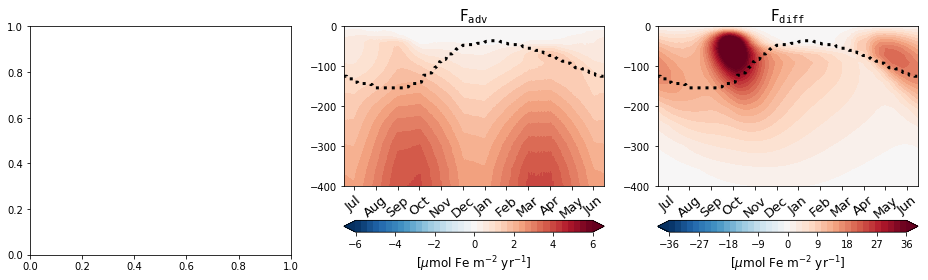

In [50]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(0,346,15), wFep_d.Zl, wFep_d.roll(day=-12).T*1e3*360*86400, 
#                   levels=np.linspace(-.9,.9,20), 
#                   cmap='RdBu_r', extend='both')
# ax1.contourf(range(14,360,15), wFep_d.Zl, wFep_d.roll(day=-13).T*1e3*360*86400, 
#             levels=np.linspace(-.9,.9,20), 
#              cmap='RdBu_r', extend='both')
# im2 = ax2.contourf(range(0,346,15), wGMFe_advd.Zl, wGMFe_advd.roll(day=-12).T*1e3*360*86400,
#                   levels=1e-0*np.linspace(-.1,.1,20), 
#                   extend='both', cmap='RdBu_r')
# ax2.contourf(range(14,360,15), wGMFe_advd.Zl, wGMFe_advd.roll(day=-13).T*1e3*360*86400,
#             levels=1e-0*np.linspace(-.1,.1,20), 
#             extend='both', cmap='RdBu_r')
# im3 = ax3.contourf(range(360), Fe_c.Z, Fe_c.roll(day=-180).T*1e3, 
#                   levels=np.linspace(0,.3,11), cmap='OrRd', extend='max')
im2 = ax2.contourf(range(360), adz_c.Zl, adz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(-6.,6.,40), 
                  cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(-36,36,40), 
                  cmap='RdBu_r', extend='both')
for c in im2.collections:
    c.set_rasterized(True)
for c in im3.collections:
    c.set_rasterized(True)
# ax1.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
#        ls=':', lw=3, color='k')
# ax2.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
#        ls=':', lw=3, color='k')
ax2.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
       ls=':', lw=3, color='k')
ax3.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
       ls=':', lw=3, color='k')
# ax1.set_title(r"w Fe", fontsize=15)
# ax2.set_title(r"w$_{GM}$Fe", fontsize=15)
ax2.set_title(r"F$_{\tt adv}$", fontsize=15)
ax3.set_title(r"F$_{\tt diff}$", fontsize=15)
# ax1.set_ylabel(r"Depth [m]", fontsize=12)
# ax2.set_xlabel(r"Month", fontsize=12)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax1.set_ylim([-400,0])
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_ylim([-400,0])
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=13, rotation=40)
ax2.set_ylim([-400,0])
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13, rotation=40)
ax3.set_ylim([-400,0])
# fig.colorbar(im1, ax=ax1, ticks=[-10,-7.5,-5.,-2.5,0,2.5,5.,7.5,10])
# fig.colorbar(im2, ax=ax2, ticks=[-.8,-.6,-.4,-.2,0,.2,.4,.6,.8])
# cbar = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.88, 0.16, 0.014, 0.68])
# cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10])
# cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
# cbar1 = fig.colorbar(im1, ax=ax1, 
#                     ticks=[-.9,-.6,-.3,0,.3,.6,.9]
#                     )
# cbar2 = fig.colorbar(im2, ax=ax2, 
#                     ticks=[-1.,-.75,-.5,-.25,0,.25,.5,.75,1.]
#                     )
cbar2 = fig.colorbar(im2, ax=ax2, 
                    ticks=[-6,-4,-2,0,2,4,6], orientation='horizontal'
                    )
cbar3 = fig.colorbar(im3, ax=ax3, 
                    ticks=[-36,-27,-18,-9,0,9,18,27,36], orientation='horizontal'
                    )
# cbar1.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar2.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
# plt.savefig(op.join(bdir,'Figures/VerticalFeflux_100km_fm07VisR1000.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


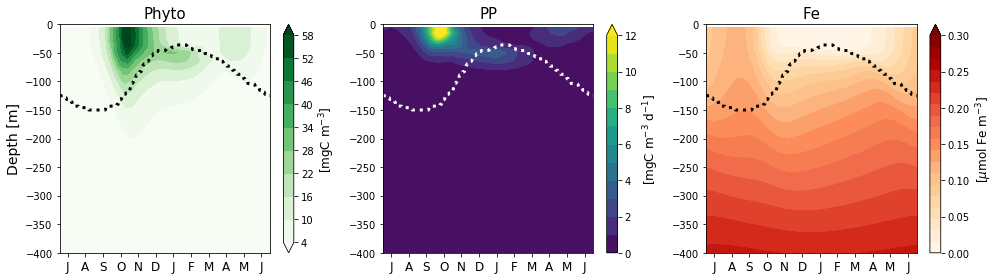

In [129]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, (ax1,ax3,ax5) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
#                   levels=np.linspace(1,20.,11), cmap='Reds', extend='both')
# im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
#                   levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
# im1 = ax1.contourf(range(360), dFedz_d.Zl, dFedz_d.T.roll(days=-180)*1e3, 
#                   levels=np.linspace(0,.002,21), cmap='Oranges', extend='both')
# ax1.plot(range(360), ZFe_d.roll(days=-180), 'k:')
im1 = ax1.contourf(range(360), (P1day + P2day).Z, (P1day + P2day).T.roll(days=-180)*106.*12., 
                  levels=np.linspace(4,58,10), cmap='Greens', extend='both')
im3 = ax3.contourf(range(360), PPCday.Z, PPCday.T.roll(days=-180)*86400., 
                  levels=np.arange(0,13,1), extend='max')
im5 = ax5.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)*1e3,
                  levels=np.linspace(0,0.3,20), 
                   extend='max', cmap='OrRd')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
       ls=':', lw=3, color='k')
ax5.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
       ls=':', lw=3, color='k')
ax3.plot(range(360), zML.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','XC','YC']).roll(days=180), 
       ls=':', lw=3, color='w')
# ax1.set_ylim([-4e2,0])
# ax2.set_ylim([-5e2,0])
ax1.set_ylim([-4e2,0])
ax3.set_ylim([-4e2,0])
ax5.set_ylim([-4e2,0])
# ax2.set_xlim([0,359])
# ax2.set_title(r"db$/$dz", fontsize=14)
ax1.set_title(r"Phyto", fontsize=15)
# ax1.set_title(r"dFe$/$dz", fontsize=15)
ax3.set_title(r"PP", fontsize=15)
ax5.set_title(r"Fe", fontsize=15)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax5.set_xticks(np.linspace(14,344,12))
ax5.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar1 = fig.colorbar(im1, ax=ax1, ticks=1e-4*np.array([0,4,8,12,16,20]))
# fig.colorbar(im2, ax=ax2)
cbar1 = fig.colorbar(im1, ax=ax1)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar5 = fig.colorbar(im5, ax=ax5, ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
cbar5.set_label(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
cbar3.set_label(r"[mgC m$^{-3}$ d$^{-1}$]", fontsize=12)
# cbar1.set_label(r"[$\mu$mol Fe m$^{-4}$]", fontsize=12)
cbar1.set_label(r"[mgC m$^{-3}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/P-PP-Fe_dailyclimatology_100km_fm07VisR1000.pdf'))